In [1]:
import nltk
nltk.download("punkt")

from nltk.tag import UnigramTagger
from nltk.corpus import treebank
nltk.download('treebank')
import pandas as pd

import os
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.sentiment.util import mark_negation


nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jega_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\jega_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jega_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\jega_\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jega_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **Data collection**

In [6]:

neg_path="C:/Users/jega_/review_polarity/txt_sentoken/neg"
positive_path="C:/Users/jega_/review_polarity/txt_sentoken/pos"

In [18]:
reviews = []
labels = []

In [19]:
for folder_name in [neg_path, positive_path]:
    if folder_name.endswith("pos"):
        label="positive"
    elif folder_name.endswith("neg"):
        label="negative"
    
    for filename in os.listdir(folder_name):
        file_path = os.path.join(folder_name, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            reviews.append(text)
            labels.append(label)

In [48]:
data = pd.DataFrame({'review': reviews, 'label': labels})

In [23]:
data.tail()

,review,label
1995,wow ! what a movie . \nit's everything a movie...,positive
1996,"richard gere can be a commanding actor , but h...",positive
1997,"glory--starring matthew broderick , denzel was...",positive
1998,steven spielberg's second epic film on world w...,positive
1999,"truman ( "" true-man "" ) burbank is the perfect...",positive


# **Tokenization and Score Sentiment**

In [67]:
def get_adverbs(text):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    adverbs = [word for word, tag in tags if tag.startswith('RB') or tag.startswith('JJ')] # we choose to keep adverbs and adjectifs because we have better accuracy
    return adverbs

In [50]:
data['adverbs'] = data['review'].apply(get_adverbs)

In [51]:
data['adverbs'][0]

['then',
 'sorta',
 'mind-fuck',
 'teen',
 'very',
 'cool',
 'very',
 'bad',
 'even',
 'harder',
 'generally',
 'such',
 'good',
 'bad',
 'just',
 "n't",
 'correctly',
 'pretty',
 'neat',
 'terribly',
 'well',
 'main',
 'simply',
 'too',
 'normal',
 'then',
 'fantasy',
 'back',
 'dead',
 'dead',
 'strange',
 'weird',
 'most',
 'simply',
 'not',
 'now',
 'personally',
 "n't",
 'now',
 'then',
 'same',
 'over',
 'again',
 'i',
 'biggest',
 'obviously',
 'big',
 'completely',
 'final',
 'even',
 'not',
 'really',
 'sad',
 'actually',
 'most',
 'half-way',
 'little',
 'still',
 "n't",
 'more',
 'bottom',
 'always',
 'sure',
 'even',
 'secret',
 'i',
 'melissa',
 'away',
 'just',
 'plain',
 'lazy',
 "n't",
 'really',
 'over',
 'again',
 'different',
 'further',
 'apparently',
 'away',
 'pretty',
 'decent',
 'teen',
 'mind-fuck',
 'here',
 'somewhere',
 'little',
 'more',
 'pretty',
 'good',
 'most',
 'wes',
 'just',
 'exact',
 'same',
 'american',
 'only',
 'new',
 'biggest',
 'own',
 'enti

In [52]:
def calculate_sentiment_score(adverbs):
    sentiment_score = 0.0
    for adverb in adverbs:
        synsets = list(swn.senti_synsets(adverb))
        if synsets:
            
            sentiment_score += synsets[0].pos_score() - synsets[0].neg_score()
    return sentiment_score

In [53]:
data['sentiment_score'] = data['adverbs'].apply(calculate_sentiment_score)

# **Accuracy**

In [54]:
# Define a threshold for classifying reviews as positive or negative.
threshold = 0.0  # Adjust this threshold as needed.

# Create a 'predicted_label' column based on the sentiment score and threshold.
data['predicted_label'] = data['sentiment_score'].apply(lambda score: "positive" if score > threshold else "negative")

In [55]:
data

,review,label,adverbs,sentiment_score,predicted_label
0,"plot : two teen couples go to a church party ,...",negative,"[then, sorta, mind-fuck, teen, very, cool, ver...",8.875,positive
1,the happy bastard's quick movie review \ndamn ...,negative,"[happy, quick, head, deserted, russian, back, ...",4.375,positive
2,it is movies like these that make a jaded movi...,negative,"[jaded, timex, late, same, reformed, undercove...",-2.750,negative
3,""" quest for camelot "" is warner bros . ' firs...",negative,"[quest, warner, first, feature-length, fully-a...",3.125,positive
4,synopsis : a mentally unstable man undergoing ...,negative,"[mentally, unstable, psychotherapy, potentiall...",-5.875,negative
...,...,...,...,...,...
1995,wow ! what a movie . \nit's everything a movie...,positive,"[funny, dramatic, interesting, weird, funny, w...",14.750,positive
1996,"richard gere can be a commanding actor , but h...",positive,"[commanding, not, always, great, together, her...",1.375,positive
1997,"glory--starring matthew broderick , denzel was...",positive,"[denzel, morgan, true, first, black, civil, yo...",-5.500,negative
1998,steven spielberg's second epic film on world w...,positive,"[steven, second, unquestioned, ever, grittiest...",8.125,positive


In [56]:
# Calculate accuracy by comparing the predicted labels with the actual labels (if available).
accuracy = (data['predicted_label'] == data['label']).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 64.15%


# **Confusion Matrix**

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

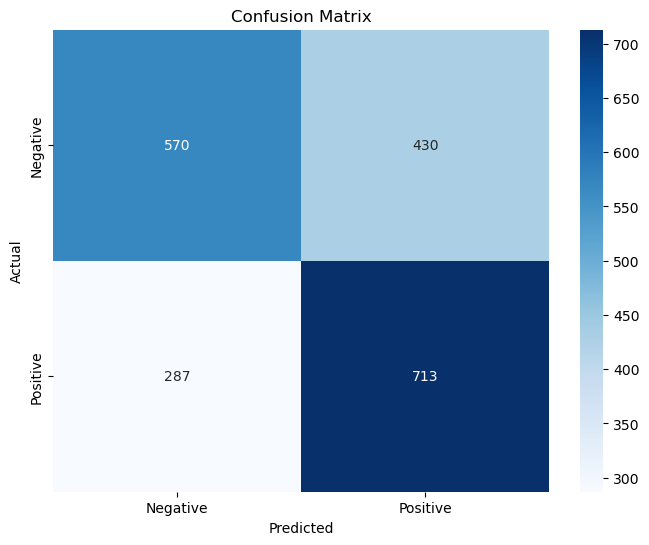

In [70]:
# Calculate a confusion matrix
conf_matrix = confusion_matrix(data['label'], data['predicted_label'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see that our model works well on postive movie review but is peu fiable for negative reviews

# **steamlit app**